# Preface

In [1]:
%matplotlib inline
import getpass
import math
import numpy as np
import os
import pickle
import socket
import sys
import time

from scipy import integrate, interpolate
from scipy.stats import poisson
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u

if getpass.getuser()=='ssaito':
    HOMEDIR = '/Users/ssaito/'
elif getpass.getuser()=='shsaito':
    HOMEDIR = '/Users/shsaito/'
    
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>")) 

In [2]:
## Plot
import matplotlib.pyplot as plt
from matplotlib import ticker, patches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, LogFormatter
from matplotlib.colors import LogNorm
from matplotlib.collections import LineCollection

from matplotlib import cm, ticker, patches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

fig_width_pt = 1024                    # Suited for LaTeX
inches_per_pt = 1.0/72.27              # Convert pt to inch
golden_mean = (math.sqrt(5)-1.0)/2.0   # Aesthetic ratio
#golden_mean = 1.
fig_width = fig_width_pt*inches_per_pt # width in inches
fig_height = fig_width*golden_mean     # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.linewidth' : 2,
          'legend.fontsize': 14,
          'text.usetex'    : False,
          'figure.figsize' : fig_size}
dotseq = [2, 2]
dashdotseq = [7, 4, 3, 4]
plt.rcParams.update(params)

def log_10_product(x, pos):
    return '%1g' % (x)

formatter = ticker.FuncFormatter(log_10_product)

In [73]:
cmc = fits.open('/Users/shsaito/Dropbox/Public/combinedcatalog_flux_SNR-cos_full_phy_fz-a0.20_OI15config_added-Re.fits')[1].data

select_zrough = (cmc['z_photo']>0) & (cmc['z_photo']<4)
cmc = cmc[select_zrough]
print(cmc.shape[0])

select_z = (cmc['z_photo']>1.6) & (cmc['z_photo']<2.4)
select_snr = cmc['SNR_PFS_OII']>6 
select = select_z & select_snr

gals_highz = cmc[select]
print(gals_highz.shape[0])

select_z = (cmc['z_photo']>0.6) & (cmc['z_photo']<=1.6)
select_snr = cmc['SNR_PFS_OII']>6 
select2 = select_z & select_snr

gals_lowz = cmc[select2]
print(gals_lowz.shape[0])

gals_other = cmc[~(select|select2)]
print(gals_other.shape[0])

503168
17782
37683
447703


# (mag,color) plot

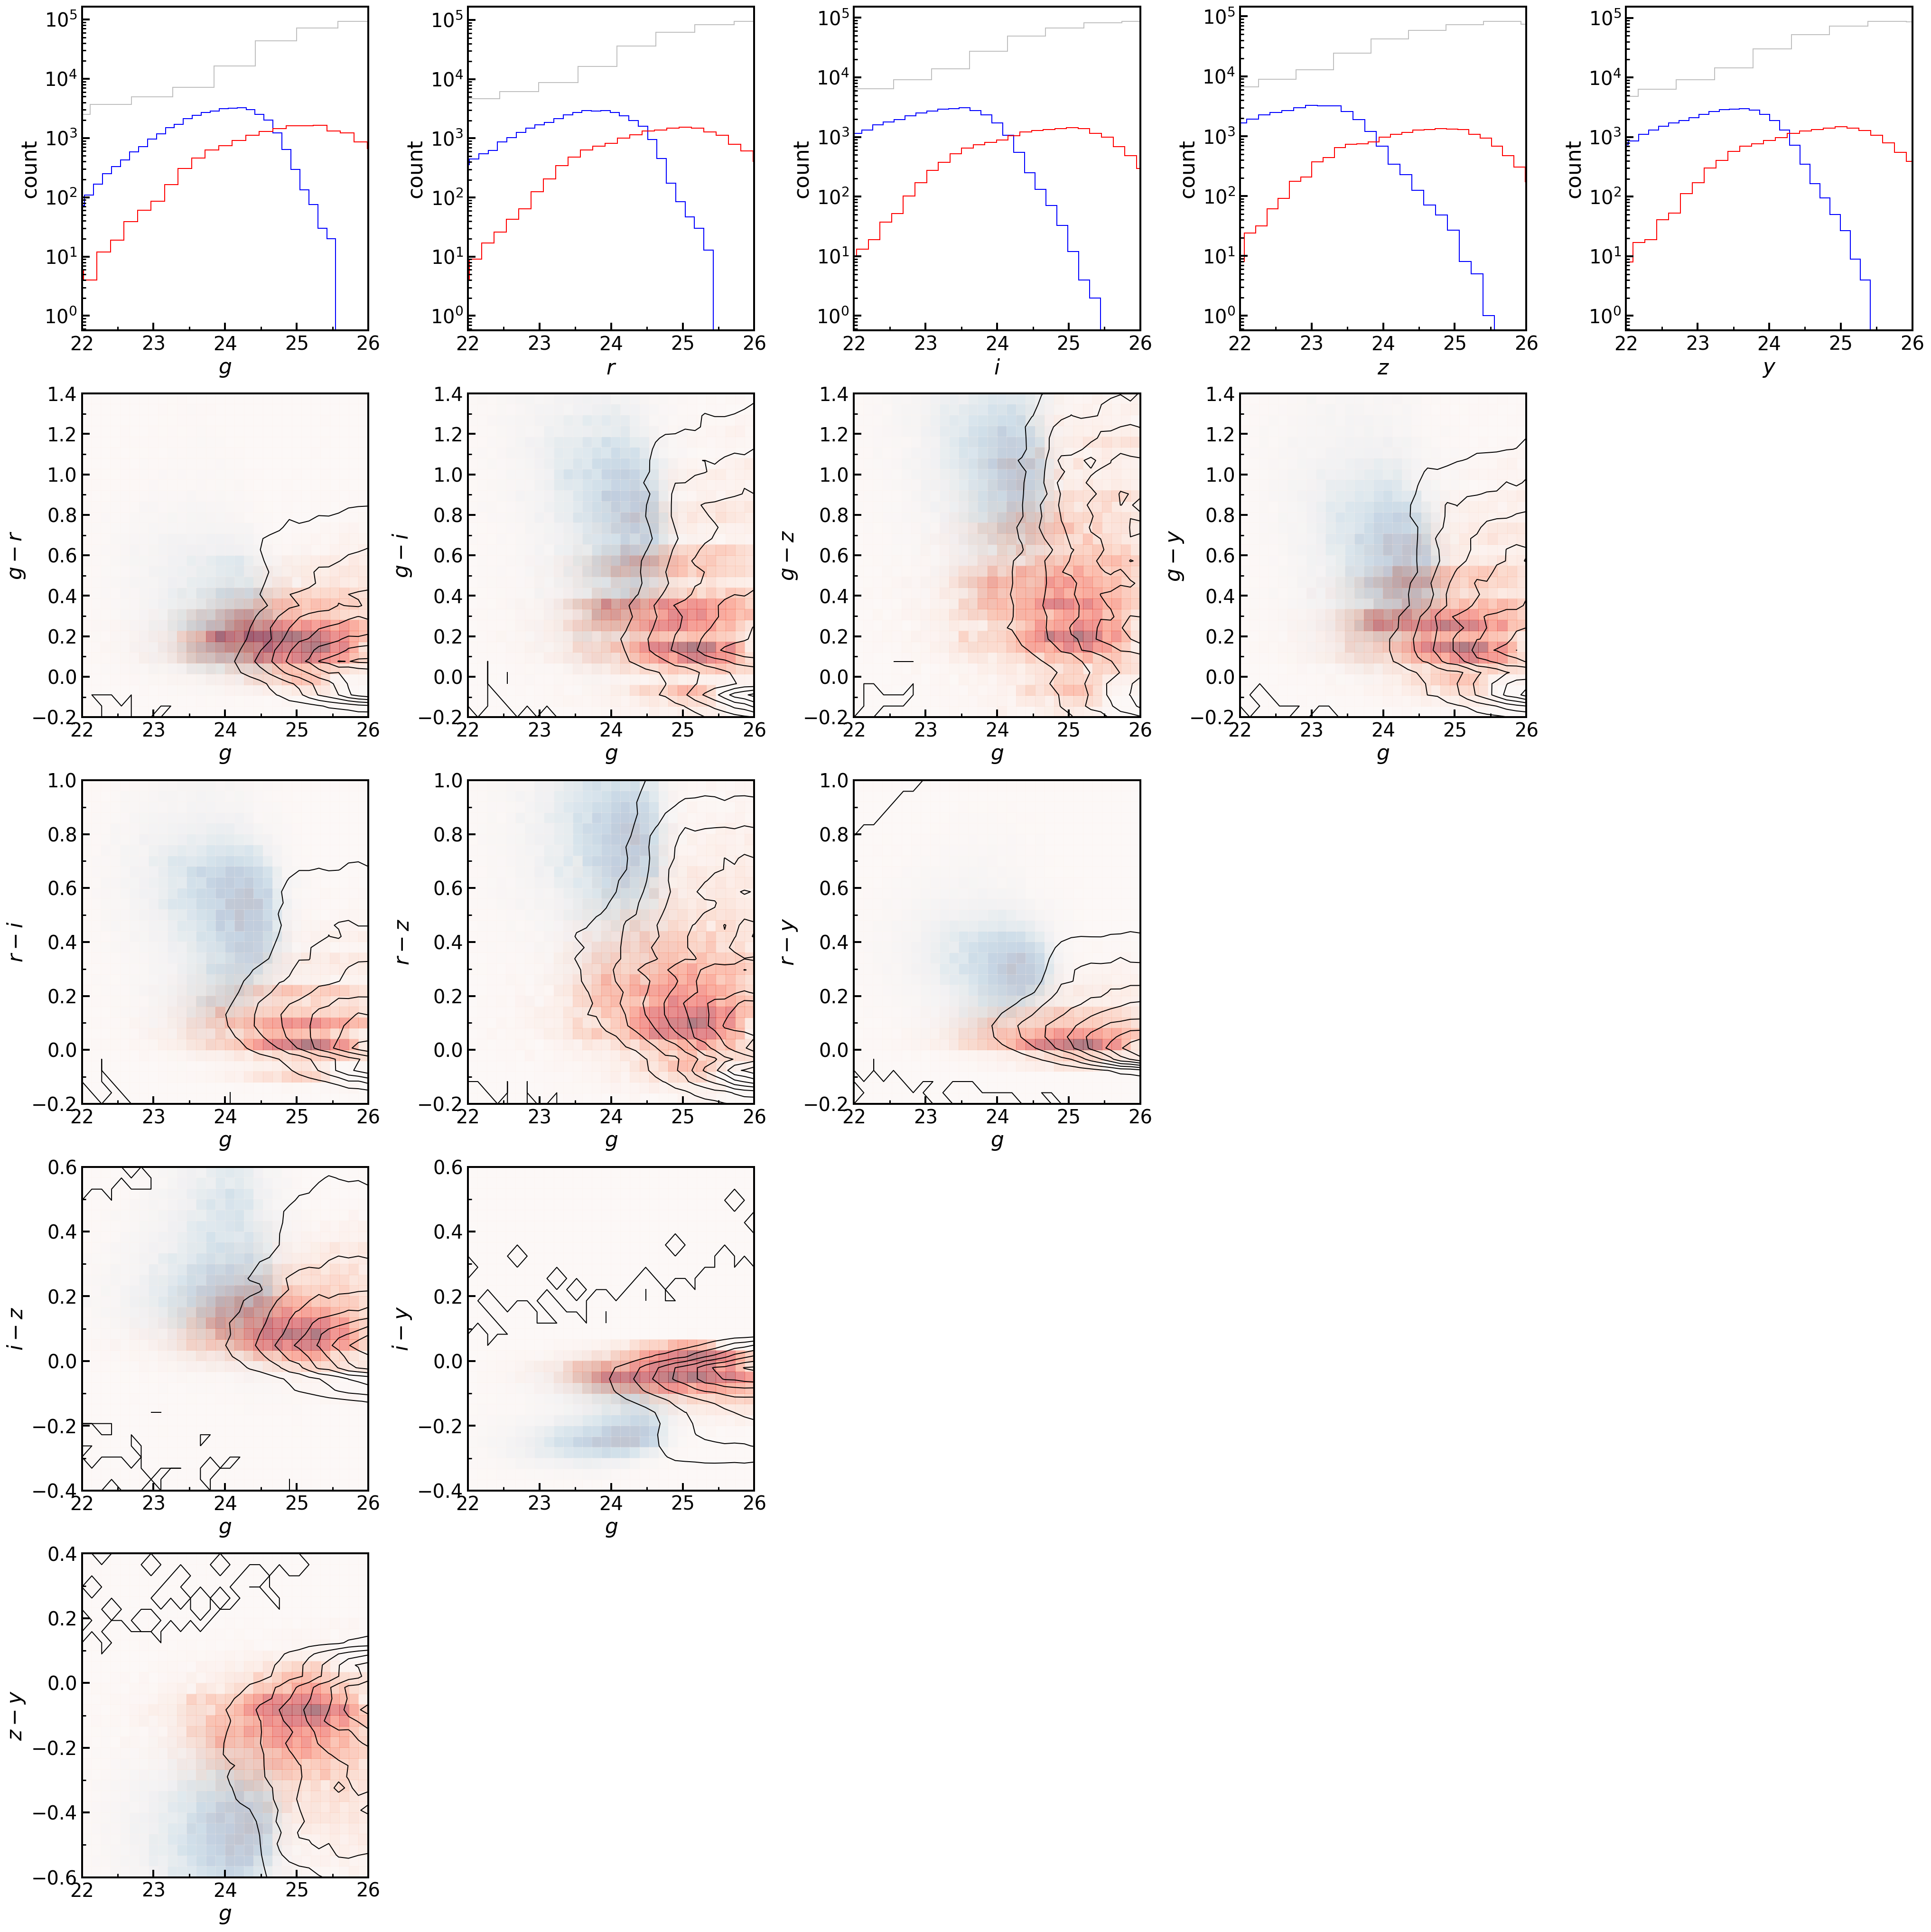

In [68]:
fig_width_pt = 2048                    # Suited for LaTeX
inches_per_pt = 1.0/72.27              # Convert pt to inch
#golden_mean = (math.sqrt(5)-1.0)/2.0   # Aesthetic ratio
golden_mean = 1
fig_width = fig_width_pt*inches_per_pt # width in inches
fig_height = fig_width*golden_mean     # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.linewidth' : 2,
          'legend.fontsize': 14,
          'text.usetex'    : False,
          'figure.figsize' : fig_size}
dotseq = [2, 2]
dashdotseq = [7, 4, 3, 4]
plt.rcParams.update(params)

fig = plt.figure(1)
plt.clf()
## Range
plt.subplots_adjust(left=0.075,bottom=0.13,top=0.98,right=0.98)
#ax = plt.axes([0.18,0.2,0.76,0.71])

ax = fig.add_subplot(551)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.set_ylim(-0.4,1)
#ax.set_ylim(1.2,1.8)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
#ax.yaxis.set_major_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'count', fontsize=22)

ax.hist(gals_lowz['g_hsc'], bins=40, histtype='step', color='blue')
ax.hist(gals_highz['g_hsc'], bins=40, histtype='step', color='red')
ax.hist(gals_other['g_hsc'], bins=40, histtype='step', color='silver')

ax = fig.add_subplot(552)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.set_ylim(-0.4,1)
#ax.set_ylim(1.2,1.8)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
#ax.yaxis.set_major_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'count', fontsize=22)

ax.hist(gals_lowz['r_hsc'], bins=40, histtype='step', color='blue')
ax.hist(gals_highz['r_hsc'], bins=40, histtype='step', color='red')
ax.hist(gals_other['r_hsc'], bins=40, histtype='step', color='silver')

ax = fig.add_subplot(553)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.set_ylim(-0.4,1)
#ax.set_ylim(1.2,1.8)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
#ax.yaxis.set_major_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$i$', fontsize=22)
ax.set_ylabel(r'count', fontsize=22)

ax.hist(gals_lowz['i_hsc'], bins=40, histtype='step', color='blue')
ax.hist(gals_highz['i_hsc'], bins=40, histtype='step', color='red')
ax.hist(gals_other['i_hsc'], bins=40, histtype='step', color='silver')

ax = fig.add_subplot(554)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.set_ylim(-0.4,1)
#ax.set_ylim(1.2,1.8)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
#ax.yaxis.set_major_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$z$', fontsize=22)
ax.set_ylabel(r'count', fontsize=22)

ax.hist(gals_lowz['z_hsc'], bins=40, histtype='step', color='blue')
ax.hist(gals_highz['z_hsc'], bins=40, histtype='step', color='red')
ax.hist(gals_other['z_hsc'], bins=40, histtype='step', color='silver')


ax = fig.add_subplot(555)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.set_ylim(-0.4,1)
#ax.set_ylim(1.2,1.8)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
#ax.yaxis.set_major_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$y$', fontsize=22)
ax.set_ylabel(r'count', fontsize=22)

ax.hist(gals_lowz['y_hsc'], bins=40, histtype='step', color='blue')
ax.hist(gals_highz['y_hsc'], bins=40, histtype='step', color='red')
ax.hist(gals_other['y_hsc'], bins=40, histtype='step', color='silver')


ax = fig.add_subplot(556)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.4
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$g-r$', fontsize=22)

#ax.hist(gals_lowz['g_hsc']-gals_lowz['i_hsc'], bins=40, histtype='step', color='blue')
#ax.hist(gals_highz['g_hsc']-gals_highz['i_hsc'], bins=40, histtype='step', color='red')
#ax.hist(gals_other['g_hsc']-gals_other['i_hsc'], bins=40, histtype='step', color='silver')

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['g_hsc']-gals_lowz['r_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['g_hsc']-gals_highz['r_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['g_hsc'], gals_other['g_hsc']-gals_other['r_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(557)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylim(-0.2,1.4)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$g-i$', fontsize=22)

#ax.hist(gals_lowz['g_hsc']-gals_lowz['i_hsc'], bins=40, histtype='step', color='blue')
#ax.hist(gals_highz['g_hsc']-gals_highz['i_hsc'], bins=40, histtype='step', color='red')
#ax.hist(gals_other['g_hsc']-gals_other['i_hsc'], bins=40, histtype='step', color='silver')

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['g_hsc']-gals_lowz['i_hsc'], bins=(30, 30), range=((22,26), (-0.2,1.4)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['g_hsc']-gals_highz['i_hsc'], bins=(30, 30), range=((22,26), (-0.2,1.4)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['g_hsc'], gals_other['g_hsc']-gals_other['i_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(558)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.4
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$g-z$', fontsize=22)

#ax.hist(gals_lowz['g_hsc']-gals_lowz['i_hsc'], bins=40, histtype='step', color='blue')
#ax.hist(gals_highz['g_hsc']-gals_highz['i_hsc'], bins=40, histtype='step', color='red')
#ax.hist(gals_other['g_hsc']-gals_other['i_hsc'], bins=40, histtype='step', color='silver')

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['g_hsc']-gals_lowz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['g_hsc']-gals_highz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['g_hsc'], gals_other['g_hsc']-gals_other['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(559)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.4
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$g-y$', fontsize=22)

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['g_hsc']-gals_lowz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['g_hsc']-gals_highz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['g_hsc'], gals_other['g_hsc']-gals_other['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)


ax = fig.add_subplot(5,5,11)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$r-i$', fontsize=22)

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['r_hsc']-gals_lowz['i_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['r_hsc']-gals_highz['i_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)


x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['g_hsc'], gals_other['r_hsc']-gals_other['i_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(5,5,12)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$r-z$', fontsize=22)

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['r_hsc']-gals_lowz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['r_hsc']-gals_highz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['r_hsc']-gals_other['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(5,5,13)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$r-y$', fontsize=22)

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['r_hsc']-gals_lowz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['r_hsc']-gals_highz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['g_hsc'], gals_other['r_hsc']-gals_other['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(5,5,16)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.4
ymax = 0.6
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$i-z$', fontsize=22)

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['i_hsc']-gals_lowz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['i_hsc']-gals_highz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['g_hsc'], gals_other['i_hsc']-gals_other['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(5,5,17)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.4
ymax =  0.6
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$i-y$', fontsize=22)

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['i_hsc']-gals_lowz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['i_hsc']-gals_highz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['g_hsc'], gals_other['i_hsc']-gals_other['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(5,5,21)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.6
ymax =  0.4
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g$', fontsize=22)
ax.set_ylabel(r'$z-y$', fontsize=22)

plt.hist2d(gals_lowz['g_hsc'], gals_lowz['z_hsc']-gals_lowz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['g_hsc'], gals_highz['z_hsc']-gals_highz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['g_hsc'], gals_other['z_hsc']-gals_other['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

fig.tight_layout()
plt.savefig('/Users/shsaito/Desktop/fullmagcol.pdf')
plt.show()

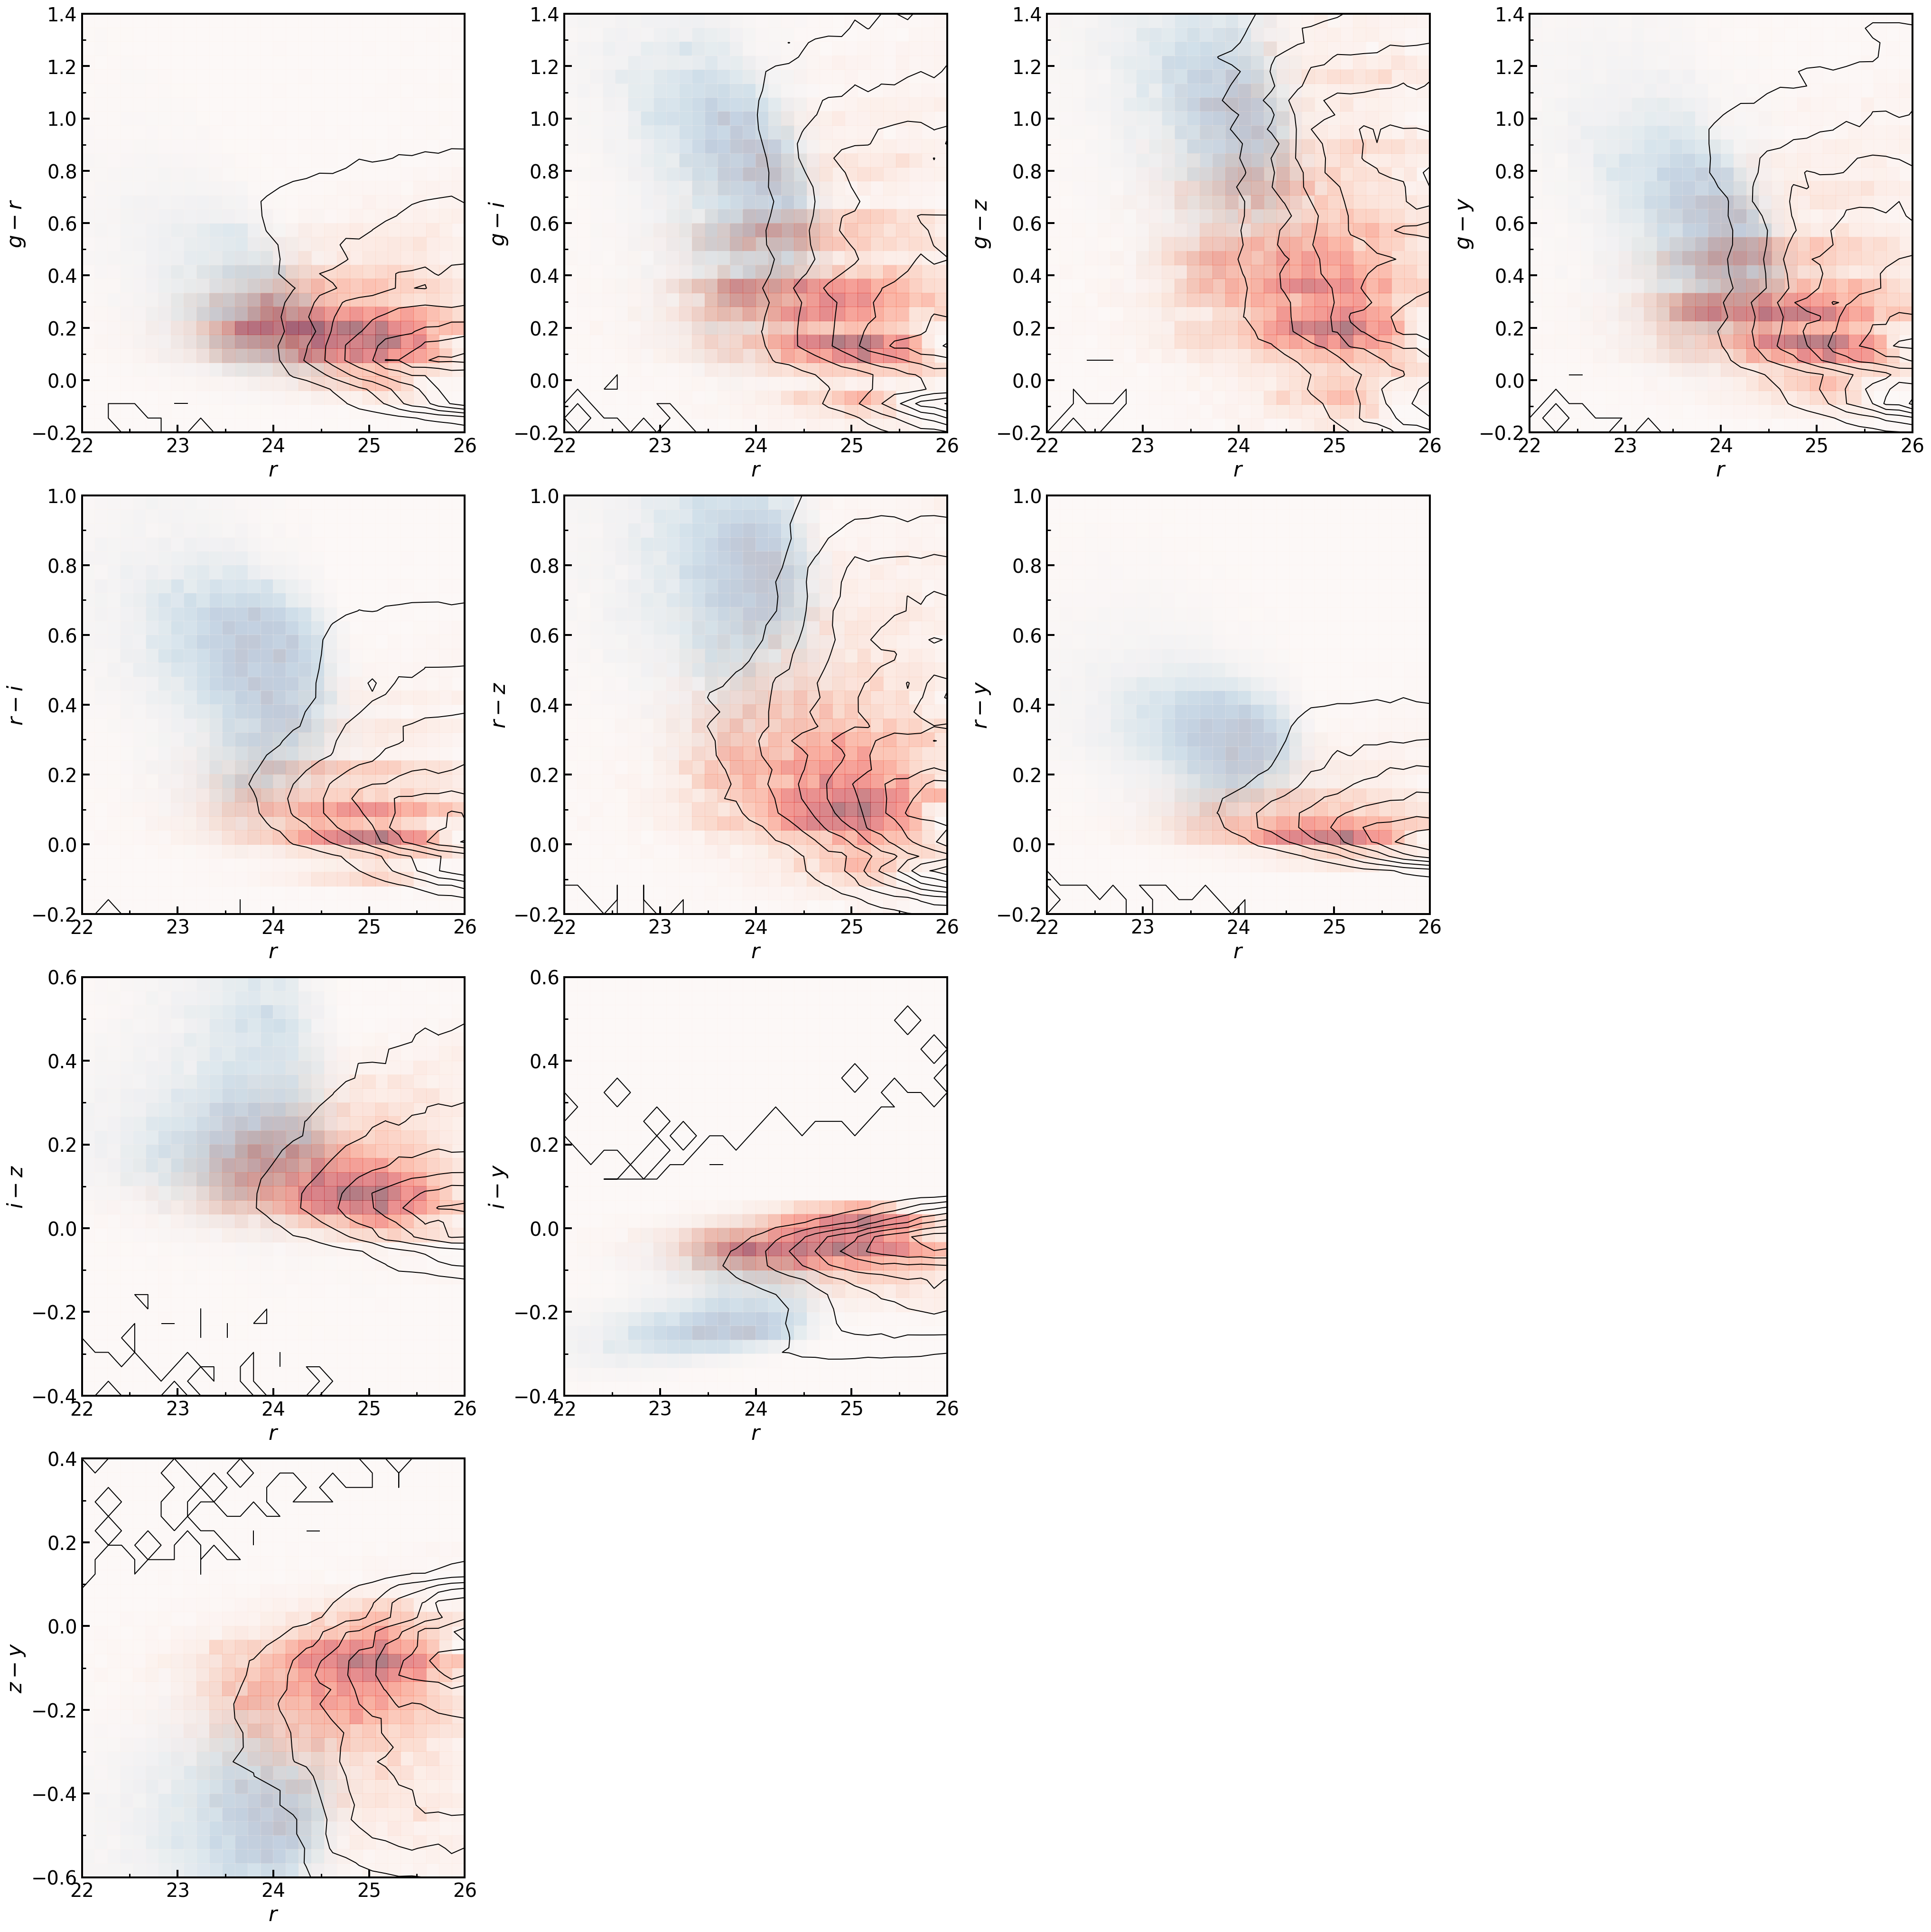

In [69]:
fig_width_pt = 2048                    # Suited for LaTeX
inches_per_pt = 1.0/72.27              # Convert pt to inch
#golden_mean = (math.sqrt(5)-1.0)/2.0   # Aesthetic ratio
golden_mean = 1
fig_width = fig_width_pt*inches_per_pt # width in inches
fig_height = fig_width*golden_mean     # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.linewidth' : 2,
          'legend.fontsize': 14,
          'text.usetex'    : False,
          'figure.figsize' : fig_size}
dotseq = [2, 2]
dashdotseq = [7, 4, 3, 4]
plt.rcParams.update(params)

fig = plt.figure(1)
plt.clf()
## Range
plt.subplots_adjust(left=0.075,bottom=0.13,top=0.98,right=0.98)
#ax = plt.axes([0.18,0.2,0.76,0.71])

ax = fig.add_subplot(4,4,1)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.4
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$g-r$', fontsize=22)

#ax.hist(gals_lowz['g_hsc']-gals_lowz['i_hsc'], bins=40, histtype='step', color='blue')
#ax.hist(gals_highz['g_hsc']-gals_highz['i_hsc'], bins=40, histtype='step', color='red')
#ax.hist(gals_other['g_hsc']-gals_other['i_hsc'], bins=40, histtype='step', color='silver')

plt.hist2d(gals_lowz['r_hsc'], gals_lowz['g_hsc']-gals_lowz['r_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['g_hsc']-gals_highz['r_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['g_hsc']-gals_other['r_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)


ax = fig.add_subplot(4,4,2)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylim(-0.2,1.4)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$g-i$', fontsize=22)

#ax.hist(gals_lowz['g_hsc']-gals_lowz['i_hsc'], bins=40, histtype='step', color='blue')
#ax.hist(gals_highz['g_hsc']-gals_highz['i_hsc'], bins=40, histtype='step', color='red')
#ax.hist(gals_other['g_hsc']-gals_other['i_hsc'], bins=40, histtype='step', color='silver')

plt.hist2d(gals_lowz['r_hsc'], gals_lowz['g_hsc']-gals_lowz['i_hsc'], bins=(30, 30), range=((22,26), (-0.2,1.4)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['g_hsc']-gals_highz['i_hsc'], bins=(30, 30), range=((22,26), (-0.2,1.4)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['g_hsc']-gals_other['i_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(4,4,3)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.4
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$g-z$', fontsize=22)

#ax.hist(gals_lowz['g_hsc']-gals_lowz['i_hsc'], bins=40, histtype='step', color='blue')
#ax.hist(gals_highz['g_hsc']-gals_highz['i_hsc'], bins=40, histtype='step', color='red')
#ax.hist(gals_other['g_hsc']-gals_other['i_hsc'], bins=40, histtype='step', color='silver')

plt.hist2d(gals_lowz['r_hsc'], gals_lowz['g_hsc']-gals_lowz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['g_hsc']-gals_highz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['g_hsc']-gals_other['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(4,4,4)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.4
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$g-y$', fontsize=22)

plt.hist2d(gals_lowz['r_hsc'], gals_lowz['g_hsc']-gals_lowz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['g_hsc']-gals_highz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['g_hsc']-gals_other['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(4,4,5)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$r-i$', fontsize=22)

plt.hist2d(gals_lowz['r_hsc'], gals_lowz['r_hsc']-gals_lowz['i_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['r_hsc']-gals_highz['i_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['r_hsc']-gals_other['i_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(4,4,6)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$r-z$', fontsize=22)

plt.hist2d(gals_lowz['r_hsc'], gals_lowz['r_hsc']-gals_lowz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['r_hsc']-gals_highz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['r_hsc']-gals_other['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(4,4,7)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.2
ymax = 1.
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$r-y$', fontsize=22)

#plt.hist2d(gals_other['r_hsc'], gals_other['r_hsc']-gals_other['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Greens, alpha=0.5)
plt.hist2d(gals_lowz['r_hsc'], gals_lowz['r_hsc']-gals_lowz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['r_hsc']-gals_highz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)


x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['r_hsc']-gals_other['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(4,4,9)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.4
ymax = 0.6
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$i-z$', fontsize=22)

plt.hist2d(gals_lowz['r_hsc'], gals_lowz['i_hsc']-gals_lowz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['i_hsc']-gals_highz['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['i_hsc']-gals_other['z_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(4,4,10)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.4
ymax =  0.6
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$i-y$', fontsize=22)

plt.hist2d(gals_lowz['r_hsc'], gals_lowz['i_hsc']-gals_lowz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['i_hsc']-gals_highz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['i_hsc']-gals_other['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

ax = fig.add_subplot(4,4,13)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(22,26)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ymin = -0.6
ymax =  0.4
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r$', fontsize=22)
ax.set_ylabel(r'$z-y$', fontsize=22)

plt.hist2d(gals_lowz['r_hsc'], gals_lowz['z_hsc']-gals_lowz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)
plt.hist2d(gals_highz['r_hsc'], gals_highz['z_hsc']-gals_highz['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(22, 26, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)
Z = np.histogram2d(gals_other['r_hsc'], gals_other['z_hsc']-gals_other['y_hsc'], bins=(30, 30), range=((22,26), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)

fig.tight_layout()
plt.savefig('/Users/shsaito/Desktop/fullmagcol_r.pdf')
plt.show()

# DESI FDR 

In [57]:
mask_r = cmc['r_hsc'] < 23.4

mask_z = cmc['z_photo'] < 0.6
lowz = cmc[mask_r & mask_z] 

mask_f = cmc['flux_OII'] < 8E-17

highz_lowf = cmc[mask_r & mask_f & ~mask_z]

mask_zh = (cmc['z_photo'] > 0.6) & (cmc['z_photo'] < 1.0)
midz_highf = cmc[mask_r & ~mask_f & mask_zh]

mask_zh = (cmc['z_photo'] >= 1) & (cmc['z_photo'] < 1.3)
highz_highf = cmc[mask_r & ~mask_f & mask_zh]

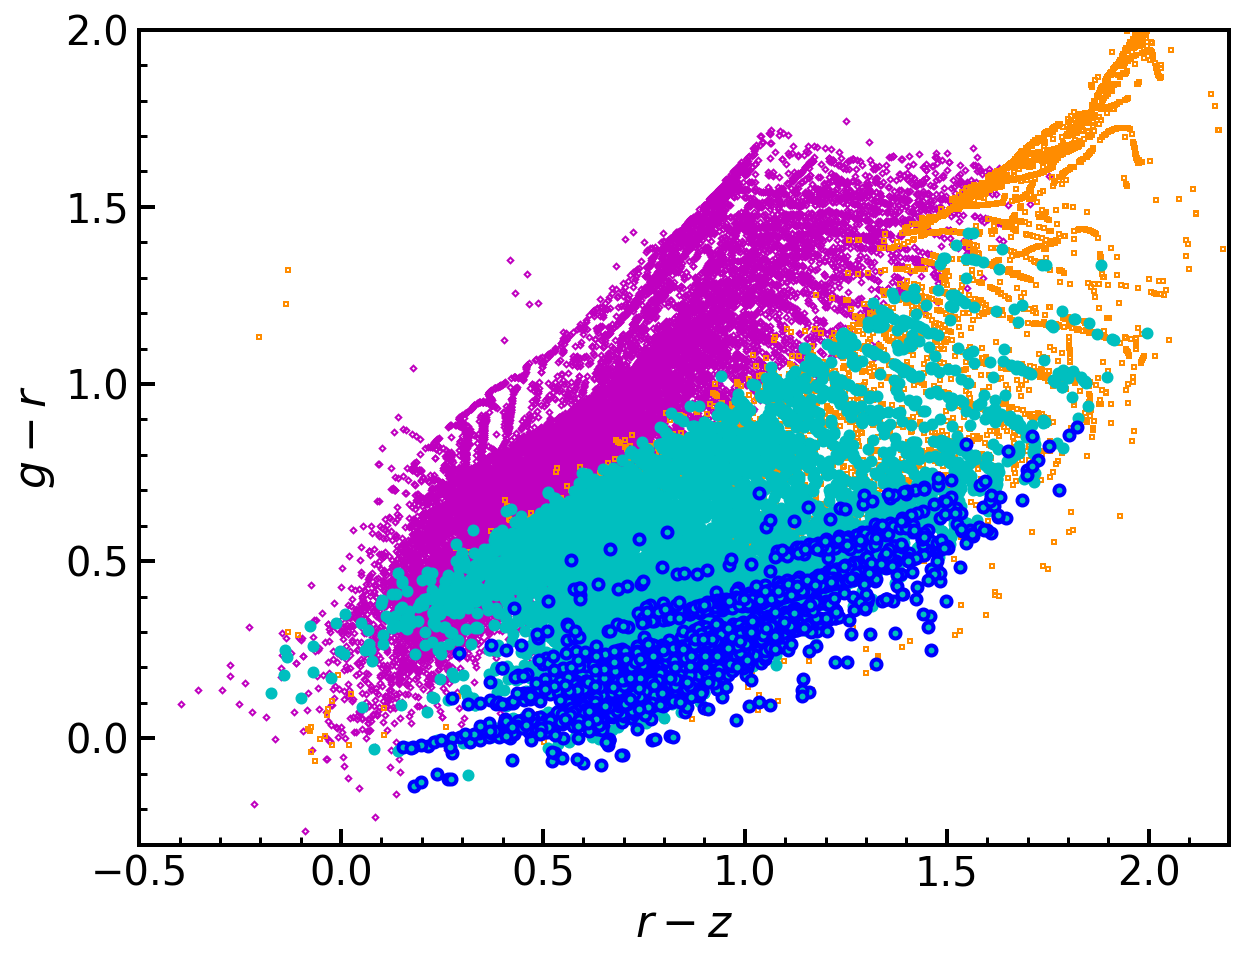

In [59]:
fig_width_pt = 720                    # Suited for LaTeX
inches_per_pt = 1.0/72.27              # Convert pt to inch
#golden_mean = (math.sqrt(5)-1.0)/2.0   # Aesthetic ratio
golden_mean = 0.8
fig_width = fig_width_pt*inches_per_pt # width in inches
fig_height = fig_width*golden_mean     # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.linewidth' : 2,
          'legend.fontsize': 14,
          'text.usetex'    : False,
          'figure.figsize' : fig_size}
dotseq = [2, 2]
dashdotseq = [7, 4, 3, 4]
plt.rcParams.update(params)

fig = plt.figure(1)
plt.clf()
## Range
plt.subplots_adjust(left=0.075,bottom=0.13,top=0.98,right=0.98)
ax = plt.axes([0.18,0.2,0.76,0.71])

#ax = fig.add_subplot(4,4,1)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(-0.5,2.2)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ymin = -0.3
ymax = 2.0
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r-z$', fontsize=22)
ax.set_ylabel(r'$g-r$', fontsize=22)

ax.plot(lowz['r_hsc']-lowz['z_hsc'], lowz['g_hsc']-lowz['r_hsc'], 'mD', ms=2, fillstyle='none')

ax.plot(highz_lowf['r_hsc']-highz_lowf['z_hsc'], highz_lowf['g_hsc']-highz_lowf['r_hsc'], 's', ms=2, color='darkorange', fillstyle='none')

ax.plot(midz_highf['r_hsc']-midz_highf['z_hsc'], midz_highf['g_hsc']-midz_highf['r_hsc'], 'co', ms=5)

ax.plot(highz_highf['r_hsc']-highz_highf['z_hsc'], highz_highf['g_hsc']-highz_highf['r_hsc'], 'co', ms=5, mew=2, mec='b')

plt.savefig('/Users/shsaito/Desktop/desi_fdr.pdf')

plt.show()

## adding photometry error

In [89]:
import add_photometryerror

cmc = cmc[cmc['R_e']>0]
cmc_e = add_photometryerror.add_photometryerror(cmc)

mask_r = cmc_e['rmag_org']+cmc_e['drmag_DEcaLS'] < 23.4

mask_z = cmc_e['z_photo'] < 0.6
lowz = cmc_e[mask_r & mask_z] 

mask_f = cmc_e['flux_OII'] < 8E-17

highz_lowf = cmc_e[mask_r & mask_f & ~mask_z]

mask_zh = (cmc_e['z_photo'] > 0.6) & (cmc_e['z_photo'] < 1.0)
midz_highf = cmc_e[mask_r & ~mask_f & mask_zh]

mask_zh = (cmc_e['z_photo'] >= 1) & (cmc_e['z_photo'] < 1.3)
highz_highf = cmc_e[mask_r & ~mask_f & mask_zh]

/Users/shsaito/Dropbox/Work/Project/PFS/jnb/add_photometryerror.py:94: RuntimeWarning: invalid value encountered in log10
  arr_mags['dgmag_HSC'] = -2.5*np.log10( 1 + np.random.normal(0, sigmaf_gmag_HSC, size=arr_mags.shape[0])/10**(-0.4*arr_mags['gmag_org']) )
/Users/shsaito/Dropbox/Work/Project/PFS/jnb/add_photometryerror.py:95: RuntimeWarning: invalid value encountered in log10
  arr_mags['drmag_HSC'] = -2.5*np.log10( 1 + np.random.normal(0, sigmaf_rmag_HSC, size=arr_mags.shape[0])/10**(-0.4*arr_mags['rmag_org']) )
/Users/shsaito/Dropbox/Work/Project/PFS/jnb/add_photometryerror.py:96: RuntimeWarning: invalid value encountered in log10
  arr_mags['dimag_HSC'] = -2.5*np.log10( 1 + np.random.normal(0, sigmaf_imag_HSC, size=arr_mags.shape[0])/10**(-0.4*arr_mags['imag_org']) )
/Users/shsaito/Dropbox/Work/Project/PFS/jnb/add_photometryerror.py:97: RuntimeWarning: invalid value encountered in log10
  arr_mags['dymag_HSC'] = -2.5*np.log10( 1 + np.random.normal(0, sigmaf_ymag_HSC, size=arr_m

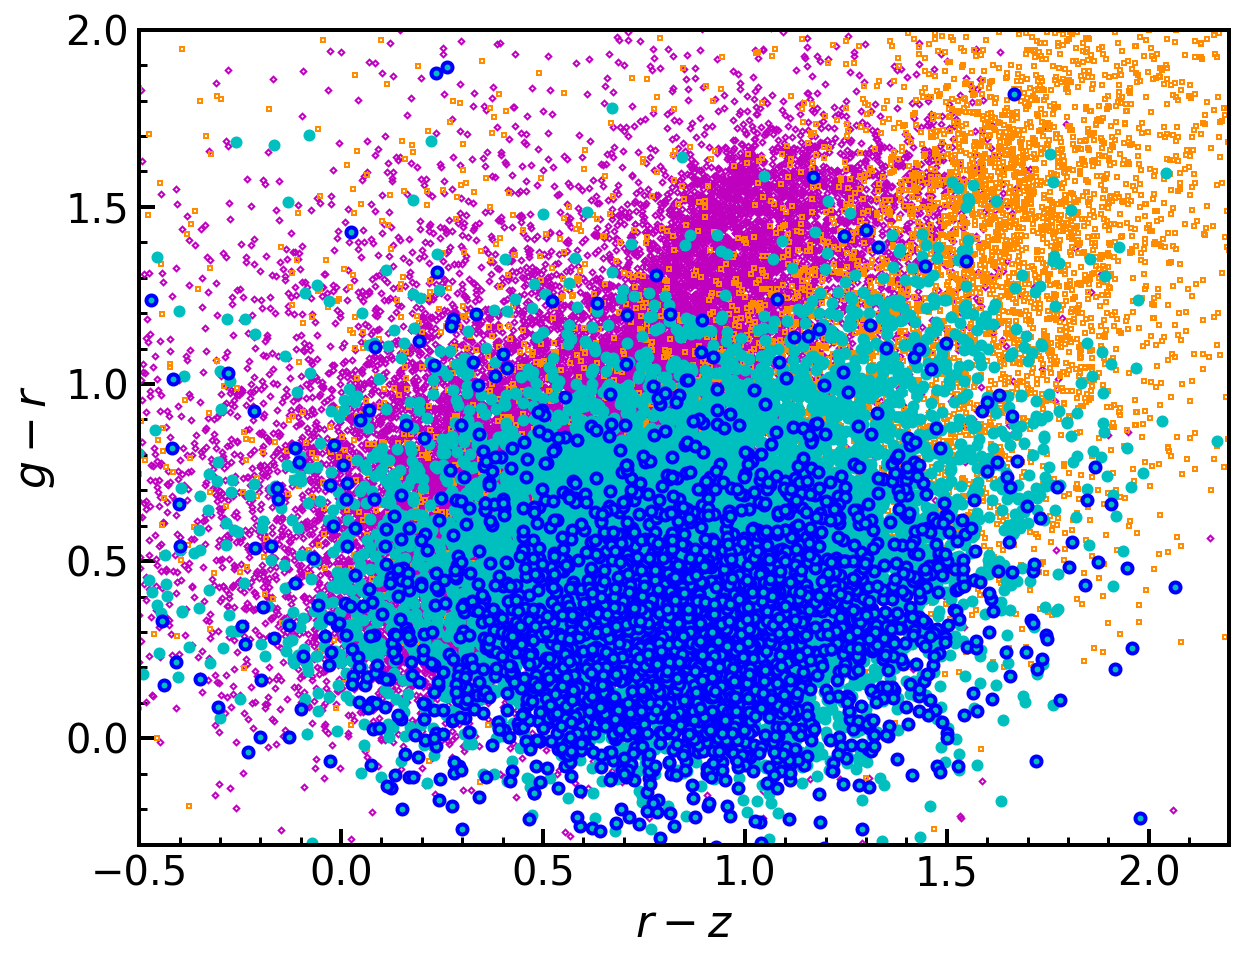

In [91]:
fig_width_pt = 720                    # Suited for LaTeX
inches_per_pt = 1.0/72.27              # Convert pt to inch
#golden_mean = (math.sqrt(5)-1.0)/2.0   # Aesthetic ratio
golden_mean = 0.8
fig_width = fig_width_pt*inches_per_pt # width in inches
fig_height = fig_width*golden_mean     # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.linewidth' : 2,
          'legend.fontsize': 14,
          'text.usetex'    : False,
          'figure.figsize' : fig_size}
dotseq = [2, 2]
dashdotseq = [7, 4, 3, 4]
plt.rcParams.update(params)

fig = plt.figure(1)
plt.clf()
## Range
plt.subplots_adjust(left=0.075,bottom=0.13,top=0.98,right=0.98)
ax = plt.axes([0.18,0.2,0.76,0.71])

#ax = fig.add_subplot(4,4,1)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(-0.5,2.2)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ymin = -0.3
ymax = 2.0
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r-z$', fontsize=22)
ax.set_ylabel(r'$g-r$', fontsize=22)

ax.plot(lowz['rmag_org']+lowz['drmag_DEcaLS']-lowz['zmag_org']-lowz['dzmag_DEcaLS'], 
        lowz['gmag_org']+lowz['dgmag_DEcaLS']-lowz['rmag_org']-lowz['drmag_DEcaLS'], 'mD', ms=2, fillstyle='none')

ax.plot(highz_lowf['rmag_org']+highz_lowf['drmag_DEcaLS']-highz_lowf['zmag_org']-highz_lowf['dzmag_DEcaLS'], 
        highz_lowf['gmag_org']+highz_lowf['dgmag_DEcaLS']-highz_lowf['rmag_org']-highz_lowf['drmag_DEcaLS'], 's', ms=2, color='darkorange', fillstyle='none')

ax.plot(midz_highf['rmag_org']+midz_highf['drmag_DEcaLS']-midz_highf['zmag_org']-midz_highf['dzmag_DEcaLS'], 
        midz_highf['gmag_org']+midz_highf['dgmag_DEcaLS']-midz_highf['rmag_org']-midz_highf['drmag_DEcaLS'], 'co', ms=5)

ax.plot(highz_highf['rmag_org']+highz_highf['drmag_DEcaLS']-highz_highf['zmag_org']-highz_highf['dzmag_DEcaLS'], 
        highz_highf['gmag_org']+highz_highf['dgmag_DEcaLS']-highz_highf['rmag_org']-highz_highf['drmag_DEcaLS'], 'co', ms=5, mew=2, mec='b')

plt.savefig('/Users/shsaito/Desktop/desi_fdr_e.png')

plt.show()

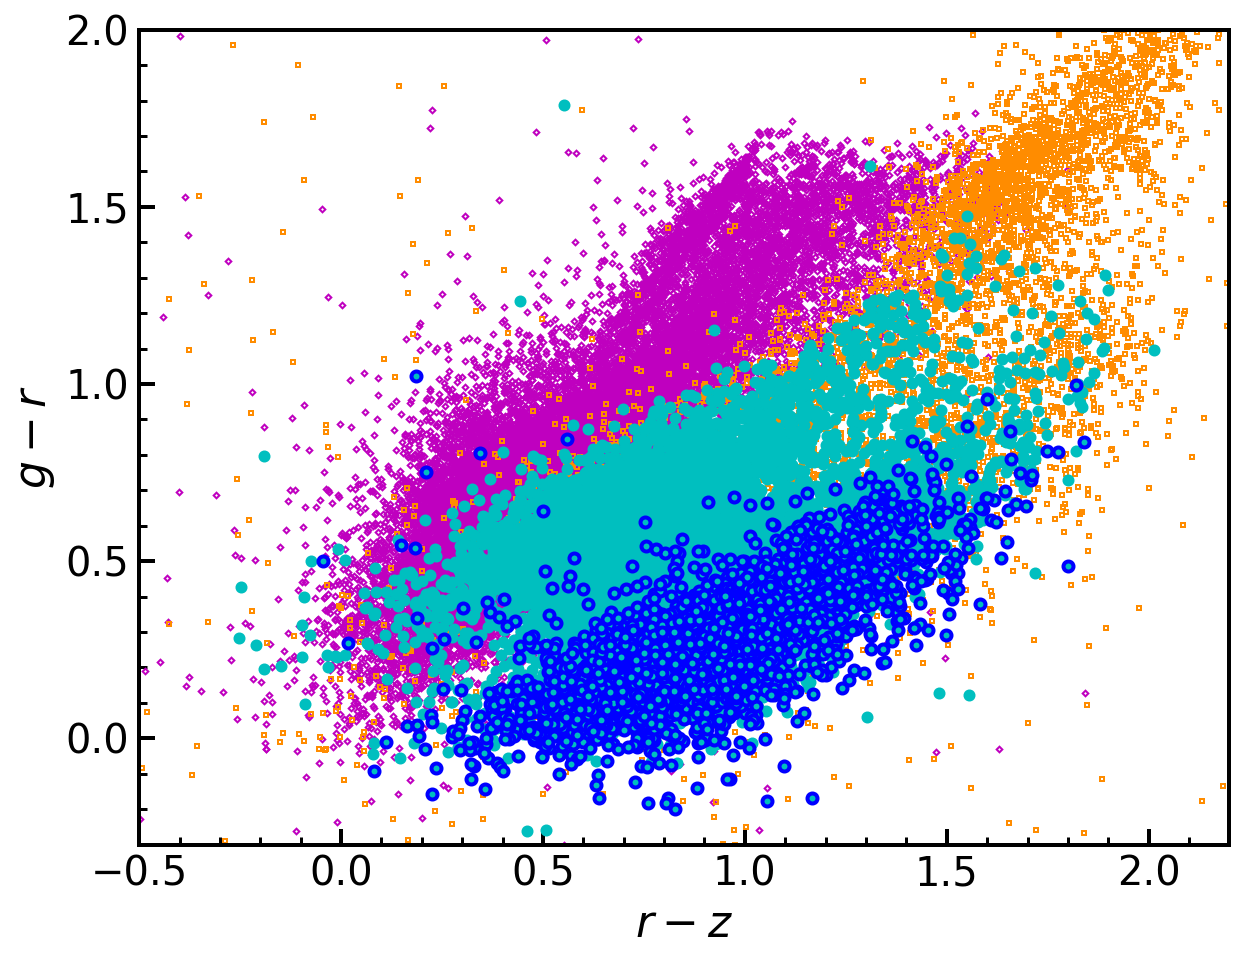

In [92]:
fig_width_pt = 720                    # Suited for LaTeX
inches_per_pt = 1.0/72.27              # Convert pt to inch
#golden_mean = (math.sqrt(5)-1.0)/2.0   # Aesthetic ratio
golden_mean = 0.8
fig_width = fig_width_pt*inches_per_pt # width in inches
fig_height = fig_width*golden_mean     # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.linewidth' : 2,
          'legend.fontsize': 14,
          'text.usetex'    : False,
          'figure.figsize' : fig_size}
dotseq = [2, 2]
dashdotseq = [7, 4, 3, 4]
plt.rcParams.update(params)

fig = plt.figure(1)
plt.clf()
## Range
plt.subplots_adjust(left=0.075,bottom=0.13,top=0.98,right=0.98)
ax = plt.axes([0.18,0.2,0.76,0.71])

#ax = fig.add_subplot(4,4,1)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(-0.5,2.2)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ymin = -0.3
ymax = 2.0
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$r-z$', fontsize=22)
ax.set_ylabel(r'$g-r$', fontsize=22)

ax.plot(lowz['rmag_org']+lowz['drmag_HSC']-lowz['zmag_org']-lowz['dzmag_HSC'], 
        lowz['gmag_org']+lowz['dgmag_HSC']-lowz['rmag_org']-lowz['drmag_HSC'], 'mD', ms=2, fillstyle='none')

ax.plot(highz_lowf['rmag_org']+highz_lowf['drmag_HSC']-highz_lowf['zmag_org']-highz_lowf['dzmag_HSC'], 
        highz_lowf['gmag_org']+highz_lowf['dgmag_HSC']-highz_lowf['rmag_org']-highz_lowf['drmag_HSC'], 's', ms=2, color='darkorange', fillstyle='none')

ax.plot(midz_highf['rmag_org']+midz_highf['drmag_HSC']-midz_highf['zmag_org']-midz_highf['dzmag_HSC'], 
        midz_highf['gmag_org']+midz_highf['dgmag_HSC']-midz_highf['rmag_org']-midz_highf['drmag_HSC'], 'co', ms=5)

ax.plot(highz_highf['rmag_org']+highz_highf['drmag_HSC']-highz_highf['zmag_org']-highz_highf['dzmag_HSC'], 
        highz_highf['gmag_org']+highz_highf['dgmag_HSC']-highz_highf['rmag_org']-highz_highf['drmag_HSC'], 'co', ms=5, mew=2, mec='b')

plt.savefig('/Users/shsaito/Desktop/desi_fdr_e_hsc.png')

plt.show()

# Hongyu's (g-r,i-z) cut

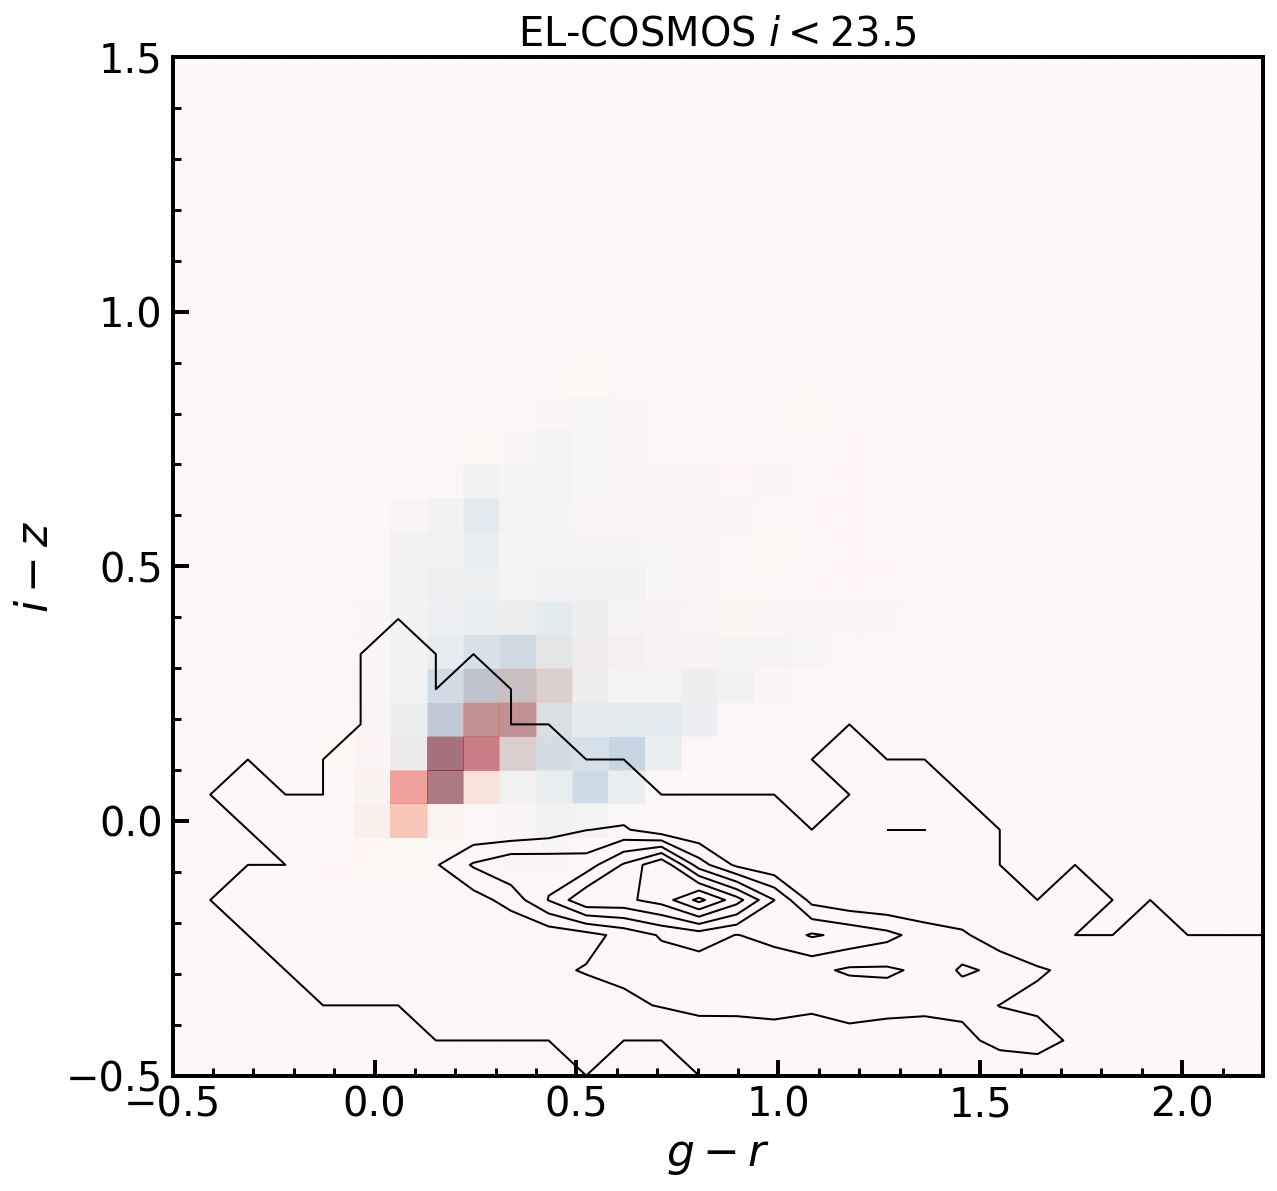

In [70]:
fig_width_pt = 720                    # Suited for LaTeX
inches_per_pt = 1.0/72.27              # Convert pt to inch
#golden_mean = (math.sqrt(5)-1.0)/2.0   # Aesthetic ratio
golden_mean = 1
fig_width = fig_width_pt*inches_per_pt # width in inches
fig_height = fig_width*golden_mean     # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.linewidth' : 2,
          'legend.fontsize': 14,
          'text.usetex'    : False,
          'figure.figsize' : fig_size}
dotseq = [2, 2]
dashdotseq = [7, 4, 3, 4]
plt.rcParams.update(params)

fig = plt.figure(1)
plt.clf()
## Range
plt.subplots_adjust(left=0.075,bottom=0.13,top=0.98,right=0.98)
ax = plt.axes([0.18,0.2,0.76,0.71])

#ax = fig.add_subplot(4,4,1)
## Log or Linear
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(formatter)   
#ax.set_yscale('log')
#ax.yaxis.set_major_formatter(formatter)   
## Axis 
ax.set_xlim(-0.5,2.2)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ymin = -0.5
ymax = 1.5
ax.set_ylim(ymin,ymax)
#ax.yaxis.set_ticks([200.,400.,1000.,2000.])
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(which='minor', direction='in', length=4, width=1.5)
ax.tick_params(which='major', direction='in', length=8, width=2, pad=5)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.xaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
    tick.tick2line.set_visible = True
for tick in ax.yaxis.get_minor_ticks():
    tick.tick2line.set_visible = True
## Axis label
ax.set_xlabel(r'$g-r$', fontsize=22)
ax.set_ylabel(r'$i-z$', fontsize=22)
ax.set_title('EL-COSMOS $i<23.5$', fontsize=20)


mask_i = gals_lowz['i_hsc'] < 23.5

plt.hist2d(gals_lowz['g_hsc'][mask_i]-gals_lowz['r_hsc'][mask_i], gals_lowz['i_hsc'][mask_i]-gals_lowz['z_hsc'][mask_i], 
           bins=(30, 30), range=((-0.5,2.2), (ymin,ymax)), cmap=plt.cm.Blues, alpha=0.5)

mask_i = gals_highz['i_hsc'] < 23.5
plt.hist2d(gals_highz['g_hsc'][mask_i]-gals_highz['r_hsc'][mask_i], gals_highz['i_hsc'][mask_i]-gals_highz['z_hsc'][mask_i], 
           bins=(30, 30), range=((-0.5,2.2), (ymin,ymax)), cmap=plt.cm.Reds, alpha=0.5)

x = np.linspace(-0.5, 2.2, 30)
y = np.linspace(ymin, ymax, 30)
X, Y = np.meshgrid(x, y)

mask_i = gals_other['i_hsc'] < 23.5
Z = np.histogram2d(gals_other['g_hsc'][mask_i]-gals_other['r_hsc'][mask_i], gals_other['i_hsc'][mask_i]-gals_other['y_hsc'][mask_i], 
                   bins=(30, 30), range=((-0.5,2.2), (ymin,ymax)))[0].T
#levels = np.linspace(500,3500,7)
cs = ax.contour(X,Y,Z,colors='k',linewidths=1)
#ax.contour(X,Y,Z,colors='k',linewidths=1)

plt.savefig('/Users/shsaito/Desktop/gr_iz.pdf')

plt.show()